# Can **you** break computer vision models?

## Problem Description

AlexNet's victory in the 2012 ImageNet Challenge marked a pivotal moment in the field of deep learning. This groundbreaking neural network, designed by Alex Krizhevsky, Ilya Sutskever, and Geoffrey Hinton, dramatically outperformed its competitors with a top-5 test error rate of 15.3%, compared to the 26.2% achieved by the second-best entry. This success highlighted the untapped potential of deep learning, particularly in convolutional neural networks (CNNs), for image recognition tasks.


Only a few years after AlexNet, CNNs surpassed humans at recognizing images! 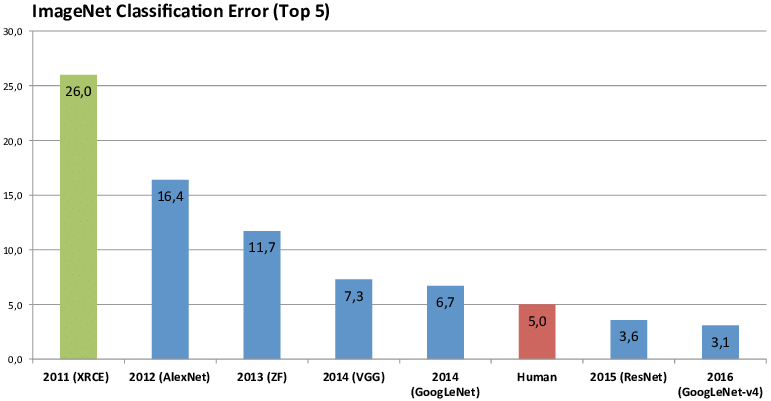

...or, more precisely, CNNs became better than humans at solving the ImageNet Challenge.

Not even two years after the 2012 ImageNet Challenge,
[Szegedy et al.](https://arxiv.org/abs/1312.6199) discovered a surprising twist to our understanding of CNNs, which were surpassing human performance in image recognition: CNNs could be easily fooled by very minor perturbations of the input images.

In particular, they found that CNNs can be misled by "adversarial examples." These are subtly perturbed images, indistinguishable to the human eye, that cause the CNN to misidentify what it sees. For instance, a slightly modified image of a cat might be wrongly classified (see example below, where the labels denote the predictions of a CNN). This reveals a unique vulnerability in how CNNs interpret visual information, despite their sophistication in pattern recognition. 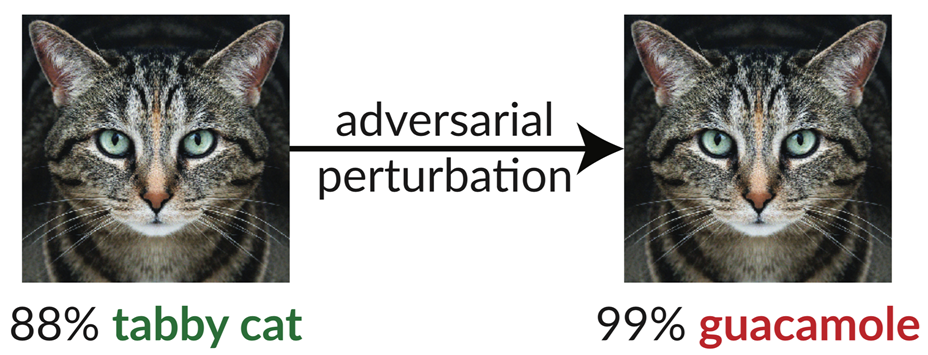



It turns out that we can find adversarial perturbations as the one above using (roughly) the same algorithm we use to train the CNN---gradient descent! Unlike standard gradient descent, which optimizes neural network parameters, we will apply gradient *ascent* in the *input* space. The intuition is that we want to change the input such that it maximizes the network's loss.

But how the we ensure that the perturbation remains "minor" and invisible to the human eye? One simple way to do so is to ensure that the perturbed image is "close" to the original one. One way to formalize this notion is to ask that the [Euclidean](https://en.wikipedia.org/wiki/Euclidean_distance) (also known as $\ell_2$) distance between the two images is small.

It turns out that we need to make only a small modifcation to the gradient ascent algorithm to fulfill the above $\ell_2$ constraint: after every gradient step, we simply move the image back to being "close". Formally speaking, we project the image onto an $\ell_2$ ball centered around the original image. This modified algorithm is known as *projected* gradient descent/ascent. Check out this [tutorial](https://adversarial-ml-tutorial.org/adversarial_examples/) for a more detailed overview.

In this problem, you will train a CNN model and make your best effort to break it! Let's start with training one of those CNNs ourselves. We're going to use a much smaller dataset called CIFAR-10.

## Task 1: Train a ResNet-18 on the CIFAR-10 dataset using PyTorch

Your task is to develop a deep learning model using the ResNet-18 architecture and train it on the CIFAR-10 dataset using the PyTorch library.

###Background and Definitions

1. **ResNet-18**: ResNet, short for Residual Networks, is a type of CNN that is known for its deep network architecture. ResNet-18 is a variant with 18 layers. It is distinguished by its use of skip connections or shortcuts to jump over some layers, which helps in alleviating the vanishing gradient problem in deep networks. ResNet architectures have shown significant effectiveness in image classification tasks.

2. **CIFAR-10 Dataset**: The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 different classes, with 6,000 images per class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes include objects like airplanes, cars, birds, cats, etc., and are commonly used for training and evaluating image recognition algorithms.

3. **PyTorch**: PyTorch is an open-source machine learning library, widely used for applications such as computer vision and natural language processing. It is known for its flexibility, ease of use, and dynamic computational graph that allows for easy and efficient model building and training.

###Task Requirements

1. Load and preprocess the CIFAR-10 dataset.
2. Use the provided ResNet-18 model below and train it on the CIFAR-10 training dataset.
3. Evaluate the model performance on the CIFAR-10 test dataset.

### Deliverables

* Python code implementing the training process.
* A report of up to 300 words describing the design choices for the training process, as well as train and test accuracy of the trained model.

To recieve full credit for this task, your model must achieve a test accuracy of at least 80%. Do **not** modify the provided architecture. Check out [this tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html) for a starting point!


In [1]:
import torch

In [2]:
cudaused = torch.cuda.is_available()

In [3]:
from torchvision.models import resnet18
net = resnet18(num_classes=10)
if (cudaused):
    net = net.cuda()

In [4]:
# Your code here

#imports
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
#load cifar-10
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

 11%|█▏        | 19562496/170498071 [00:12<00:32, 4675822.90it/s]

In [ ]:
#show images
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
#conv net already defined

#define loss and optimizer
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, 0.9)

In [ ]:
torch.set_default_device('cpu')

In [ ]:
retrainModel = False

In [ ]:
if retrainModel:
    printinterval = 4000
    criterion = criterion.cuda()
    net = net.cuda()
    #training
    for epoch in range(10):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            inputs = inputs.cuda()
            labels = labels.cuda()

            with torch.device("cuda"):

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward + backward + optimize
                outputs = net(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                running_loss += loss.item()

            # print statistics
            if i % printinterval == printinterval-1:    # print every printinterval mini-batches
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / printinterval:.3f}')
                running_loss = 0.0

        scheduler.step()

    print('Finished Training')

In [ ]:
PATH = './cifar_net.pth'

In [ ]:
if not retrainModel:
    net = resnet18(num_classes=10)
    net.load_state_dict(torch.load(PATH, map_location=torch.device('cpu')))

In [ ]:
if retrainModel:
    #save model
    torch.save(net.state_dict(), PATH)

In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
criterion = criterion.cpu()
net = net.cpu()

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

In [ ]:
correct = 0
total = 0
if (cudaused):
    criterion = criterion.cuda()
    net = net.cuda()
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data

        if (cudaused):
            images = images.cuda()
            labels = labels.cuda()

        if (cudaused):
            with torch.device("cuda"):

                # calculate outputs by running images through the network
                outputs = net(images)
                # the class with the highest energy is what we choose as prediction
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        else:
            # calculate outputs by running images through the network
            outputs = net(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total :.2f} %')

# **From Legolas:**

**Easiest way to go was to follow the tutorial and learn how pytorch works from there. I went through trial and error to find hyperparameters I was satisfied with. I lowered the momentum in the optimizer from 0.9 to 0.8 and applied an exponential learning rate scheduler (with 0.8 gamma) to hopefully be able to train longer. Throwing more compute at the problem did help. Also added a bypass that loads Resnet from file.**

**Final accuracy: 71.64% (what how to 80%)**

## Task 2: Create adversarial examples for your trained model

Build upon your previously trained ResNet-18 model on the CIFAR-10 dataset by generating $\ell_2$ adversarial examples to test the model's robustness. You may use any library of your choice available online or develop the method from scratch.

###Task Requirements

1. **$\varepsilon$ Values**: Use the following values for the radius $\varepsilon$ of the $\ell_2$ ball onto which we project the adversarial examples: [0.25, 1.0, 1.5]. These values determine the magnitude of the perturbation, and represent the strength of the adversarial attack.

2. **Generate Adversarial Examples**: Modify all test images from the CIFAR-10 dataset using your adversarial attack.

3. **Test Model Accuracy**: Evaluate the accuracy of your ResNet-18 model on these adversarially modified images.

###Deliverables

* Python code used for generating adversarial examples and testing the model.
* A short (~1 paragraph) report describing your approach, including the test accuracy for each value of $\varepsilon$.

Credit for this task will be inversely proportional to the model's accuracy on your adversarial test set. In particular, your score for this task will be based on your written report, together with the formula $\frac{1}{\{\text{accuracy at }\varepsilon=0.25\} + 1} + \frac{1}{\{\text{accuracy at }\varepsilon=1.0\} + 1} + \frac{1}{\{\text{accuracy at }\varepsilon=1.5\} + 1}$.

In [ ]:
# Your code here

#scoop some new images
dataiter = iter(testloader)
for i in range(3):
    next(dataiter)
imageslist = []
labelslist = []
for i in range(4):
    a, b = next(dataiter)
    imageslist.append(a)
    labelslist.append(b)
images = torch.cat(imageslist)
labels = torch.cat(labelslist)
#images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(len(labels))))

In [ ]:
#measure unpeturbed prediction of images
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(len(labels))))

In [ ]:
#measure accuracy of prediction
correct = 0
for x in range(len(labels)):
    if (predicted[x] == labels[x]):
        correct += 1
print(f"Percent correct: {correct/len(labels) * 100:.1f}%")

In [ ]:
#set up loss and optimizer
images.requires_grad_(True)
originalimages = images.clone().detach()
#originalimages.requires_grad_(True)
imagecriterion = nn.CrossEntropyLoss()

In [ ]:
#enforce distance rule
#all using tensor methods so gradient can be calculated through this function, if actually needed
def clampdistance(image, magnitude, original = None):
    retval = torch.tensor(())
    retval = retval.new_zeros(image.size())
    if (original == None):
        for i in range(image.size()[0]):
            deltatensor = image[i].clone().detach()
            deltamagnitude = deltatensor.pow(2).sum().pow(0.5).clamp(min = magnitude)
            retval[i] = deltatensor.mul(magnitude).divide(deltamagnitude)
    else:
        for i in range(image.size()[0]):
            deltatensor = image[i] - original[i]
            deltamagnitude = deltatensor.pow(2).sum().pow(0.5).clamp(min = magnitude)
            retval[i] = original[i].add(deltatensor.mul(magnitude).divide(deltamagnitude))
    return retval

In [ ]:
#clamps to max white and max black
#for curiosity's sake
def hardlimit(image, original = None):
    retval = torch.tensor(())
    retval = retval.new_zeros(image.size())
    if (original == None):
        for i in range(image.size()[0]):
            deltatensor = image[i].clone().detach()
            retval[i] = deltatensor.clamp(min = -1, max = 1)
    else:
        for i in range(image.size()[0]):
            deltatensor = image[i] - original[i]
            retval[i] = original[i].add(deltatensor.clamp(min = -1, max = 1))
    return retval

In [ ]:
#see what happens when an arbitrary vector is clamped to the original image
zeros = torch.tensor(())
zeros = zeros.new_ones(images.size())
#zeros = originalimages.clone().detach()
zerosimage = clampdistance(zeros, 1, originalimages)

In [ ]:
#looks pretty close to the original image
imshow(torchvision.utils.make_grid(zerosimage))

In [ ]:
#verify the distance
((images - zerosimage).pow(2).sum().item()/len(labels)) ** 0.5

In [ ]:
#custom loss function
#maximising this means maximizing wrong answers and minimizing right answers
def imagetrainloss(outputs, labels):
    labelsmatrix = torch.tensor(())
    labelsmatrix = labelsmatrix.new_ones(outputs.size())
    for i in range(len(labels)):
        labelsmatrix[i][labels[i]] = -3
    return outputs.mul(labelsmatrix).sum()

In [ ]:
#measure initial loss
outputs = net(images)
loss = imagecriterion(outputs, labels)
print(f"{loss.item():.3f}")

In [ ]:
if (cudaused):
    #imagecriterion = imagecriterion.cuda()
    net = net.cuda()
    images = images.cuda()
    originalimages = originalimages.cuda()
    labels = labels.cuda()
images.requires_grad_(True)
images.retain_grad()
#learning rate is super high now so that the training actually is able to change the labels
#probably because the image is clamped
imageoptimizer = optim.SGD([images], lr=0.01, momentum=0.9, maximize = True)
printinterval = 100
running_loss = 0.0
#train images
for epoch in range(800):

    if (cudaused):
        with torch.device("cuda"):
            imageoptimizer.zero_grad()

            outputs = net(images)
            loss = imagetrainloss(outputs, labels)
            loss.backward()
            running_loss += loss.item()
            imageoptimizer.step()

            images.requires_grad_(False)
            images = clampdistance(images, 1.5, originalimages)
            images.requires_grad_(True)
            imageoptimizer = optim.SGD([images], lr=0.01, momentum=0.9, maximize = True)
    else:
        imageoptimizer.zero_grad()

        outputs = net(images)
        loss = imagetrainloss(outputs, labels)
        loss.backward()
        running_loss += loss.item()
        imageoptimizer.step()

        images.requires_grad_(False)
        images = clampdistance(images, 1.5, originalimages)
        #images = hardlimit(images, originalimages)
        images.requires_grad_(True)
        imageoptimizer = optim.SGD([images], lr=0.01, momentum=0.9, maximize = True)

    if (epoch % printinterval == printinterval - 1):
        print(f"[{epoch + 1}] loss: {running_loss / printinterval:.3f}")
        running_loss = 0

print("Finished Training")

In [ ]:
#measure post-training loss
outputs = net(images)
loss = imagecriterion(outputs, labels)
print(f"{loss.item():.3f}")

In [ ]:
#measure peturbed prediction of images
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(len(labels))))

In [ ]:
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(len(labels))))

In [ ]:
#measure accuracy of prediction
correct = 0
for x in range(len(labels)):
    if (predicted[x] == labels[x]):
        correct += 1
print(f"Percent correct: {correct/len(labels) * 100:.1f}%")

##**From Legolas:**

**Trained 16 images. Initial accuracy was 75.0%.**

**My approach was simply to use the same mechanism that trained the Resnet, but instead of optimizing the net to minimize loss, optimizing the input images to maximize loss. I also used a custom loss function that, when maximized, directly incentivizes lowering the correct answer and raising the wrong answers.**

**(also the marking may or may not incentivize cherry-picking initial images that the net gets wrong to get better marks)**

**0.25: 50.0% accuracy**

**1.00: 6.2% accuracy**

**1.50: 0.0% accuracy**

Original image:

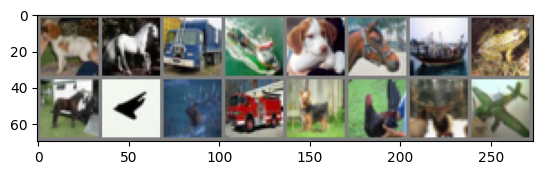

0.25 image:

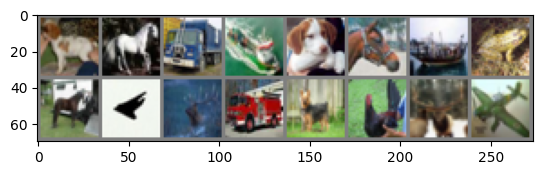

1.00 image:

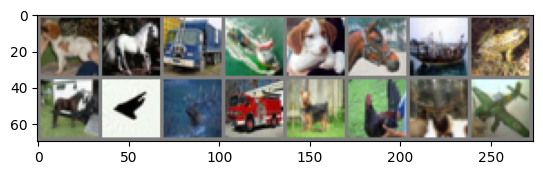

1.50 image:

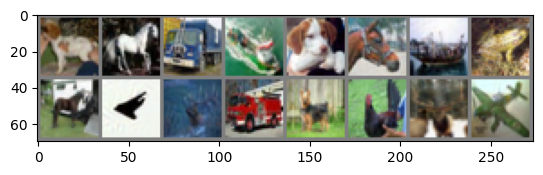

## Task 3: Customize your attack

Now that you've seen how easy is to fool a CNN, let's try making some modification to the attack.
One possible concern with our perturbations is that they may not be that imperceptible for humans. For example, they could pertrub the foreground of the image in a (slightly) noticeable way.
To address that, let's employ a simple heuristic: let's assume the foreground, i.e., main object, is always in the center of the image. Let's try to capitalize on this idea and design an attack that perturbs the center of the image a lot less than the rest.

Your task is to build upon your previously trained ResNet-18 model on the CIFAR-10 dataset by generating custom $\ell_\infty$ adversarial examples to test the model's robustness. You may use any library of your choice available online or develop the method from scratch.

###Task Requirements

1. **$\varepsilon$ Values**: Use the following values for the radius $\varepsilon$ of the $\ell_\infty$ ball onto which we project the adversarial examples: $2/255$ for the center $16\times 16$ pixels of the image, and $8/255$ for the rest.

2. **Generate Adversarial Examples**: Modify all test images from the CIFAR-10 dataset using your custom adversarial attack.

3. **Test Model Accuracy**: Evaluate the accuracy of your ResNet-18 model on these adversarially modified images.

###Deliverables

* Python code used for generating the custom adversarial examples and testing the model.
* A short (~1 paragraph) report describing your approach, including the test accuracy for each value of $\varepsilon$.
* A figure comparing the $\ell_2$ adversarial examples from Task 2 with the custom ones from this task for 3 test examples from CIFAR-10.

Credit for this task will be assigned analogously to Task 2.

In [ ]:
# Your code here

#all that's needed to change is the clamping function
#enforce distance rule
def clampdistance2(image, magnitude1, magnitude2, original = None):
    retval = torch.tensor(())
    retval = retval.new_zeros(image.size())
    centerones = torch.tensor(())
    centerones = centerones.new_zeros((3, 32, 32))
    for c in range(3):
        for x in range(8, 8+16):
            for y in range(8, 8+16):
                centerones[c][x][y] = 1
    centerzeros = torch.tensor(())
    centerzeros = centerzeros.new_ones((3, 32, 32))
    centerzeros = centerzeros.sub(centerones)
    if (original == None):
        for i in range(image.size()[0]):
            deltatensor = image[i].clone().detach()
            deltacenter = deltatensor.mul(centerones).clamp(min = -magnitude1, max = magnitude1)
            deltaouter = deltatensor.mul(centerzeros).clamp(min = -magnitude2, max = magnitude2)
            retval[i] = deltacenter.add(deltaouter)
    else:
        for i in range(image.size()[0]):
            deltatensor = image[i] - original[i]
            deltacenter = deltatensor.mul(centerones).clamp(min = -magnitude1, max = magnitude1)
            deltaouter = deltatensor.mul(centerzeros).clamp(min = -magnitude2, max = magnitude2)
            retval[i] = original[i].add(deltacenter).add(deltaouter)
    return retval

In [ ]:
#scoop some new images
dataiter = iter(testloader)
for i in range(3):
    next(dataiter)
imageslist = []
labelslist = []
for i in range(4):
    a, b = next(dataiter)
    imageslist.append(a)
    labelslist.append(b)
images = torch.cat(imageslist)
labels = torch.cat(labelslist)
#images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(len(labels))))

In [ ]:
#measure unpeturbed prediction of images
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(len(labels))))

In [ ]:
#measure accuracy of prediction
correct = 0
for x in range(len(labels)):
    if (predicted[x] == labels[x]):
        correct += 1
print(f"Percent correct: {correct/len(labels) * 100:.1f}%")

In [ ]:
#set up loss and optimizer
images.requires_grad_(True)
originalimages = images.clone().detach()
#originalimages.requires_grad_(True)
imagecriterion = nn.CrossEntropyLoss()

In [ ]:
#see what happens when an arbitrary vector is clamped to the original image
zeros = torch.tensor(())
zeros = zeros.new_ones(images.size())
#zeros = originalimages.clone().detach()
zerosimage = clampdistance2(zeros, 2/255, 8/255, originalimages)

In [ ]:
#looks pretty close to the original image
imshow(torchvision.utils.make_grid(zerosimage))

In [ ]:
#measure initial loss
outputs = net(images)
loss = imagecriterion(outputs, labels)
print(f"{loss.item():.3f}")

In [ ]:
if (cudaused):
    #imagecriterion = imagecriterion.cuda()
    net = net.cuda()
    images = images.cuda()
    originalimages = originalimages.cuda()
    labels = labels.cuda()
images.requires_grad_(True)
images.retain_grad()
#learning rate is super high now so that the training actually is able to change the labels
#probably because the image is clamped
imageoptimizer = optim.SGD([images], lr=0.01, momentum=0.9, maximize = True)
printinterval = 100
running_loss = 0.0
#train images
for epoch in range(800):

    if (cudaused):
        with torch.device("cuda"):
            imageoptimizer.zero_grad()

            outputs = net(images)
            loss = imagetrainloss(outputs, labels)
            loss.backward()
            running_loss += loss.item()
            imageoptimizer.step()

            images.requires_grad_(False)
            images = clampdistance2(images, 2/255, 8/255, originalimages)
            images.requires_grad_(True)
            imageoptimizer = optim.SGD([images], lr=0.01, momentum=0.9, maximize = True)
    else:
        imageoptimizer.zero_grad()

        outputs = net(images)
        loss = imagetrainloss(outputs, labels)
        loss.backward()
        running_loss += loss.item()
        imageoptimizer.step()

        images.requires_grad_(False)
        images = clampdistance2(images, 2/255, 8/255, originalimages)
        images.requires_grad_(True)
        imageoptimizer = optim.SGD([images], lr=0.01, momentum=0.9, maximize = True)

    if (epoch % printinterval == printinterval - 1):
        print(f"[{epoch + 1}] loss: {running_loss / printinterval:.3f}")
        running_loss = 0

print("Finished Training")

In [ ]:
#measure post-training loss
outputs = net(images)
loss = imagecriterion(outputs, labels)
print(f"{loss.item():.3f}")

In [ ]:
#measure peturbed prediction of images
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:6s}'
                              for j in range(len(labels))))

In [ ]:
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:6s}' for j in range(len(labels))))

In [ ]:
#measure accuracy of prediction
correct = 0
for x in range(len(labels)):
    if (predicted[x] == labels[x]):
        correct += 1
print(f"Percent correct: {correct/len(labels) * 100:.1f}%")

## **From Legolas:**

**All I did was change the image clamping function. Other code was copied from previous task, so same backpropagation and training of images was used. Same images used as well.**

**Final: 6.2% accuracy**

**(what the hell is a $\ell_\infty$? this may not be very clear, I took this to mean a simple clamping operation on each element)**

Original image:

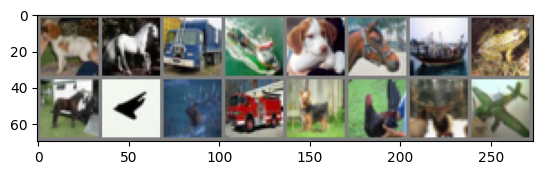

Trained $\ell_\infty$ image:

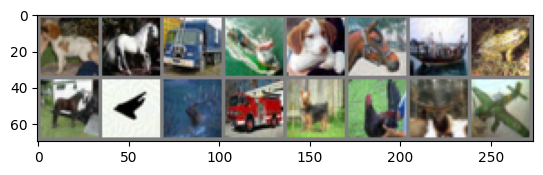

## Task 4: Create an adaptive attack against Alice's custom model

Now suppose that you try to implement your attack on a model trained by your friend Alice. However, she has heard that people are creating adversarial examples, so she created her own AliceNet, which she claims is robust to such adversarial interventions. Can you prove her wrong?

Alice has implemented a defense mechanism in her neural network model to protect against adversarial attacks. Of course, she won't tell you what her defense is! Your task is to develop an adaptive attack that successfully circumvents this defense. Note: this task may be significantly more challenging than the previous ones :)

###Task Requirements

1. **Understand the Defense**: Analyze Alice's model to understand the type of defense implemented. This could involve reviewing the model architecture, preprocessing steps, or any additional mechanisms employed for defense.

2. **Design an Adaptive Attack**: Develop an attack strategy that goes around Alice's defense. This might involve modifying standard attack methods like PGD.

3. **Generate Adversarial Examples**: Modify all test images from the CIFAR-10 dataset using your adversarial attack. You are allowed to modify the original test images within an $\ell_\infty$ ball of radius $8/255$.

4. **Test Model Accuracy**: Evaluate the accuracy of AliceNet on these adversarially modified images.


###Deliverables

* Python code used for your attack and generation of the adversarial CIFAR-10 test set.
* A short (up to a few paragraphs) report detailing your analysis of the defense, the approach used for the adaptive attack, and the success rate of your attack on the CIFAR-10 test set.

Credit for this task will be assigned analogously to Task 2.

Hint: This [paper](https://arxiv.org/abs/1802.00420) might be a good starting point.

In [ ]:
!pip install wget
import wget

In [ ]:
from functools import partial
from typing import Any, Callable, List, Optional, Type, Union

import numpy as np
import torch
import torch.nn as nn
from torch import Tensor
from tqdm import tqdm

def conv3x3(in_planes: int, out_planes: int, stride: int = 1, groups: int = 1, dilation: int = 1) -> nn.Conv2d:
    """3x3 convolution with padding"""
    return nn.Conv2d(
        in_planes,
        out_planes,
        kernel_size=3,
        stride=stride,
        padding=dilation,
        groups=groups,
        bias=False,
        dilation=dilation,
    )


def conv1x1(in_planes: int, out_planes: int, stride: int = 1) -> nn.Conv2d:
    """1x1 convolution"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)


def conv2x2(in_planes: int, out_planes: int, stride: int = 1) -> nn.Conv2d:
    """2x2 convolution"""
    conv = nn.Conv2d(in_planes, out_planes, kernel_size=2, stride=stride, padding=1, bias=False)
    conv.weight = nn.Parameter(torch.ones_like(conv.weight))
    return conv


class preprocess(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input):
        b, c, h, w = input.size()
        output = torch.zeros_like(input).cpu().numpy()

        for i in range(b):
          img = input[i].cpu().numpy()
          mask = np.random.binomial(1, 0.7, h * w).reshape(h, w)
          p_obs = len(mask[mask == 1]) / (h * w)
          for channel in range(c):
              u, sigma, v = np.linalg.svd(img[channel] * mask)
              S = np.zeros((h, w))
              for j in range(int(0.7 * h)):
                  S[j][j] = sigma[j]
              W = np.dot(np.dot(u, S), v) / p_obs
              W[W < -1] = -1
              W[W > 1] = 1
              output[i, channel] = (W + 1) / 2
        output = torch.from_numpy(output).float().to(input.device)
        return output

    @staticmethod
    def backward(ctx, grad_output):
        return grad_output


class BasicBlock(nn.Module):
    expansion: int = 1

    def __init__(
        self,
        inplanes: int,
        planes: int,
        stride: int = 1,
        downsample: Optional[nn.Module] = None,
        groups: int = 1,
        base_width: int = 64,
        dilation: int = 1,
        norm_layer: Optional[Callable[..., nn.Module]] = None,
    ) -> None:
        super().__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = norm_layer(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = norm_layer(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x: Tensor) -> Tensor:
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class Bottleneck(nn.Module):
    expansion: int = 4

    def __init__(
        self,
        inplanes: int,
        planes: int,
        stride: int = 1,
        downsample: Optional[nn.Module] = None,
        groups: int = 1,
        base_width: int = 64,
        dilation: int = 1,
        norm_layer: Optional[Callable[..., nn.Module]] = None,
    ) -> None:
        super().__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        width = int(planes * (base_width / 64.0)) * groups
        # Both self.conv2 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv1x1(inplanes, width)
        self.bn1 = norm_layer(width)
        self.conv2 = conv3x3(width, width, stride, groups, dilation)
        self.bn2 = norm_layer(width)
        self.conv3 = conv1x1(width, planes * self.expansion)
        self.bn3 = norm_layer(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x: Tensor) -> Tensor:
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class AliceNet(nn.Module):
    def __init__(
        self,
        block: Type[Union[BasicBlock, Bottleneck]],
        layers: List[int],
        num_classes: int = 10,
        zero_init_residual: bool = False,
        groups: int = 1,
        width_per_group: int = 64,
        replace_stride_with_dilation: Optional[List[bool]] = None,
        norm_layer: Optional[Callable[..., nn.Module]] = None,
    ) -> None:
        super().__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        self._norm_layer = norm_layer

        self.inplanes = 64
        self.dilation = 1
        self.preprocess = preprocess()

        if replace_stride_with_dilation is None:
            replace_stride_with_dilation = [False, False, False]
        if len(replace_stride_with_dilation) != 3:
            raise ValueError(
                "replace_stride_with_dilation should be None "
                f"or a 3-element tuple, got {replace_stride_with_dilation}"
            )
        self.groups = groups
        self.base_width = width_per_group
        self.preprocess = preprocess()
        self.conv1 = nn.Conv2d(3, self.inplanes, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = norm_layer(self.inplanes)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2, dilate=replace_stride_with_dilation[0])
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2, dilate=replace_stride_with_dilation[1])
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2, dilate=replace_stride_with_dilation[2])
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode="fan_out", nonlinearity="relu")
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck) and m.bn3.weight is not None:
                    nn.init.constant_(m.bn3.weight, 0)
                elif isinstance(m, BasicBlock) and m.bn2.weight is not None:
                    nn.init.constant_(m.bn2.weight, 0)

    def _make_layer(
        self,
        block: Type[Union[BasicBlock, Bottleneck]],
        planes: int,
        blocks: int,
        stride: int = 1,
        dilate: bool = False,
    ) -> nn.Sequential:
        norm_layer = self._norm_layer
        downsample = None
        previous_dilation = self.dilation
        if dilate:
            self.dilation *= stride
            stride = 1
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride),
                norm_layer(planes * block.expansion),
            )

        layers = []
        layers.append(
            block(
                self.inplanes, planes, stride, downsample, self.groups, self.base_width, previous_dilation, norm_layer
            )
        )
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(
                block(
                    self.inplanes,
                    planes,
                    groups=self.groups,
                    base_width=self.base_width,
                    dilation=self.dilation,
                    norm_layer=norm_layer,
                )
            )

        return nn.Sequential(*layers)

    def _forward_impl(self, x: Tensor) -> Tensor:
        x = self.preprocess.apply(x)
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        max_inds = x.argmax(dim=1)
        mask = torch.zeros_like(x)
        mask.scatter_(1, max_inds.unsqueeze(1), 1.)
        x *= mask
        x = x / (x + 1e-9)
        return x

    def forward(self, x: Tensor, **kwargs) -> Tensor:
        return self._forward_impl(x)


def get_alicenet() -> AliceNet:

    model = AliceNet(BasicBlock, [2, 2, 2, 2])

    url = 'https://www.dropbox.com/scl/fi/s3vatccoexnyq9p9nr5zo/alice_model_IOAI.pt?rlkey=b6f996keu0vurkoxuubg1tjsm&dl=1'
    wget.download(url, out='./alice_model.pt', bar=None)
    trained_ckpt = torch.load('./alice_model.pt')
    model.load_state_dict(trained_ckpt)

    return model

In [ ]:
alicenet = get_alicenet().cuda()

In [ ]:
# Your code here

#Gradient descent is unlikely to work
#Genetic algorithm on the other hand is (probably) unbeatable
#General setup:
#Make a population of images
#Evaluate all images
#Retain best images, Mutate best and good images (through normal distribution randomness?), and Delete worst images
#Repeat

#Learning rate should apply to magnitude of normal distribution
#This has the drawback of requiring much more computation